Pada kesempatan kali ini kita akan melakukan pengolahan data covid-19 di Indonesia. Data ini diambil dari situs kawalcovid19.
Data diambil sebagian dari tanggal 1 Juli 2021 - 14 November 2021.

Pada kesempatan kali ini kita akan coba melakukan forecasting dengan menerapkan metode data science yang sudah kita pelajari sebelumnya

1. Business Understanding / Question

Pada kesempatan kali ini kita ingin mengetahui bagaimana perkembangan kasus baru pada tanggal 15 Nov 2021 - 14 Des 2021 di Indonesia. Jika diasumsikan tidak adanya outbreak mendadak dan masuknya varian baru apakah kasusnya bisa menurun dan sejauh apa menurunnya. 

2. Data Collection 

Disini kita akan mencoba untuk mengumpulkan data yang kita butuhkan. Beruntungnya, kita sudah memiliki datanya dan hanya tinggal melakukan pemanggilan.

In [2]:
#import semua package/library pada sel ini, jika butuh memasukkan package/library baru maka run ulang sel ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

In [3]:
#panggil dalam bentuk dataframe pada langkah kali ini, dan tampilkan dengan metode tail
covid = pd.read_csv("./covid_indonesia_2.csv")
covid.tail() 

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
132,2021-11-10,480,4249323,9537,531,4096194,14,143592
133,2021-11-11,435,4249758,9486,470,4096664,16,143608
134,2021-11-12,399,4250157,9305,560,4097224,20,143628
135,2021-11-13,359,4250516,9198,451,4097675,15,143643
136,2021-11-14,339,4250855,9018,503,4098178,16,143659


Expected Output 

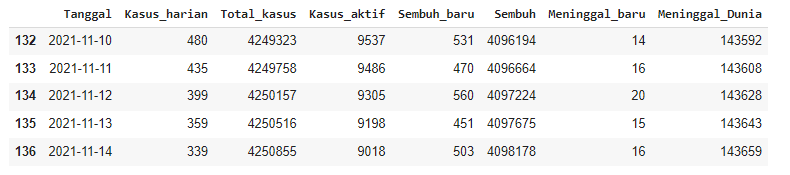

2. Data Preparation

Pada langkah ini kita akan menyiapkan data yang kita butuhkan. kita akan menggunakan dua kolom pada kesempatan kali ini yaitu total kasus dan tanggal. pertama kita lihat dulu detail dari dataset kita.

In [4]:
covid.describe()

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


Expected Output 

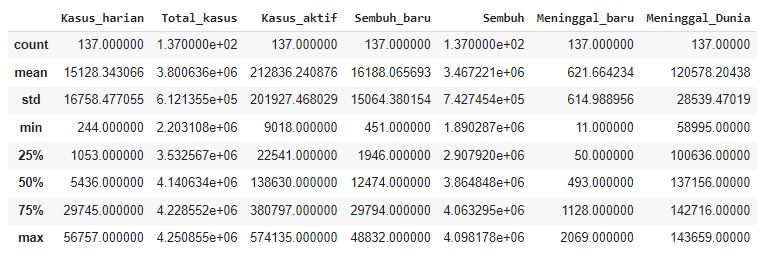

lalu kita lihat tipe data dari semua kolom pada dataset

In [5]:
covid.dtypes

Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object

Expected Output 

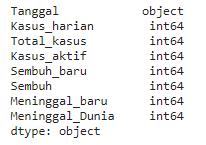

Karena yang akan kita gunakan adalah kolom tanggal sebagai time-series dan kasus harian sebagai input kita. maka kita perhatikan dua kolom tersebut.
Pada detail kasus harian terlihat nilai max dan min yang sangat jauh dengan 50% data berada di angka 5000 an. jauh dari rata-rata di 15000 an. sehingga kita perlu melakukan normalisasi pada kolom tersebut. Lalu karena mesin kita bekerja dengan numerik, maka kita akan ubah tanggal kita jadi numerik.

In [6]:
'''pada kolom ini kita akan melakukan transformasi dan menambahkan kolom baru pada dataframe kita. 
Kita beri nama kolom baru dengan data hasil normalisasi tersebut sebagai cases_norm.
Pada bagian ini saya akan menggunakan metode logaritmik, dipersilahkan jika peserta ingin menggunakan metode yang lain
'''

covid["cases_norm"] = covid["Kasus_harian"].apply(lambda x: math.log(x))
covid.head()

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416


Expected Output 

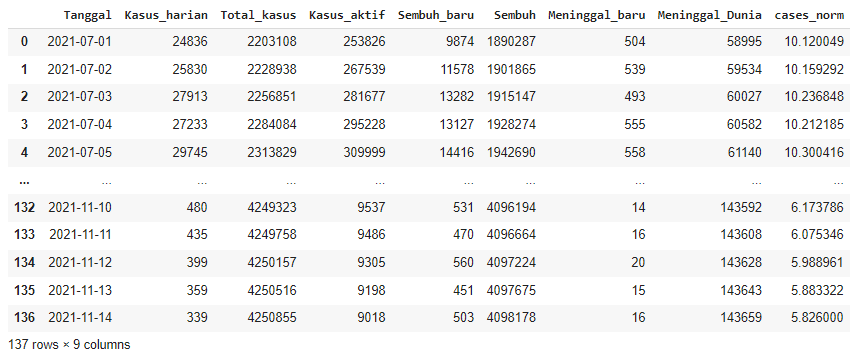

Setelah ini kita akan mengubah kolom tanggal menjadi kolom numerik dengan 1 Juli 2021 sebagai dasar. 
Artinya saya akan mengubah 

2021-07-01 menjadi 0, 

2021-07-02 menjadi 1,

dst.

In [7]:
'''Dengan memanfaatkan metode to_datetime pada pandas silahkan ubah row index 0 pada tanggal dan masukkan pada suatu variabel bernama default_date.
Nilai inilah yang akan menjadi nilai pengurang untuk tanggal lainnya
'''

default_date = pd.to_datetime(covid['Tanggal'][0])
print(f'nilai default_date adalah : {default_date}')

nilai default_date adalah : 2021-07-01 00:00:00


Expected Output :

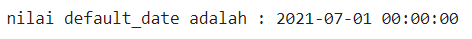

Sekarang kita akan membuat fungsi yang akan mengubah semua tanggal pada kolom menjadi numerik dengan basis pada tanggal 1 Juli 2021.

In [8]:
'''Pada kesempatan kali ini kita akan memanfaatkan apply() dan lambda().
Kita akan masukkan pada sebuah kolom baru bernama days. lalu kita tampilkan dataframe terbaru
Hint
...['days'] = ....apply(lambda x: pd.Timedelta(pd.to_datetime(x) - ...).days)

'''
covid['days'] = covid['Tanggal'].apply(lambda x: pd.Timedelta(pd.to_datetime(x) - default_date).days)
covid

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm,days
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049,0
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292,1
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848,2
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185,3
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416,4
...,...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786,132
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346,133
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961,134
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322,135


Expected Output 

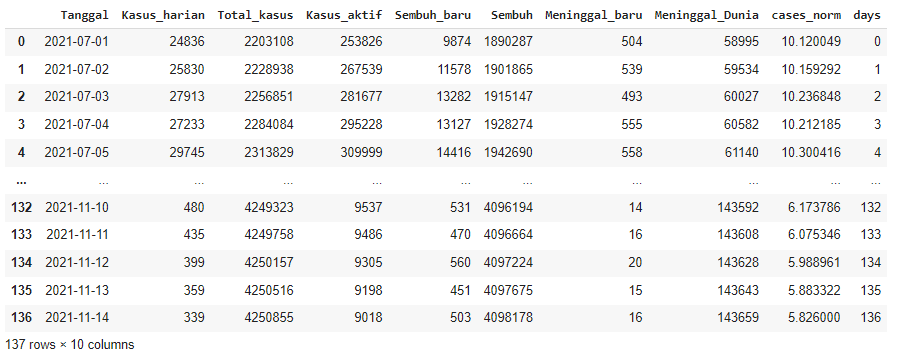

Langkah terakhir,
Kita akan membuat copy dari data yang kolom cases_norm dan days ke dalam dataframe baru.

In [9]:
#isikan pada sel ini dataframe terbaru dan tampilkan
casesPerDay = covid.copy()
casesPerDay = casesPerDay[["cases_norm", "days"]]
casesPerDay

,cases_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4
...,...,...
132,6.173786,132
133,6.075346,133
134,5.988961,134
135,5.883322,135


Expected Output 

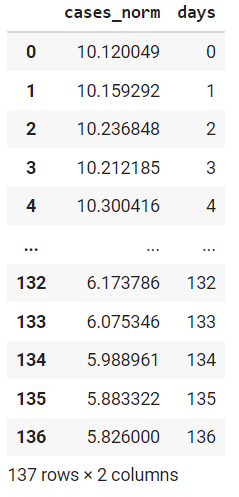

4. Data Processing

Sekarang kita akan memproses data kita. Terdapat dua bagian, pertama adalah pembuatan model dan kedua adalah evaluasi sederhana.

In [10]:
#pembuatan model
'''import/tambahkan semua package/library pada sel paling atas(terkait library)
pada bagian kali ini kita akan mengubah days -- sumbu x dan cases_norm  -- sumbu y.
masukkan kedua kolom tersebut pada variabel yang bersesuaian. ubah menjadi bentuk numpy array dengan np.array()
Hint: gunakan .reshape((-1, 1)) pada sumbu x saat mengubah menjadi np.array agar mengubah dimensi array tersebut.
kita bagi menjadi data training dan test dengan test_size = 0.2
'''

X_train, X_test, y_train, y_test = train_test_split(
    casesPerDay["days"], 
    casesPerDay["cases_norm"], 
    random_state=42, 
    test_size=0.2
)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')

dimensi dari X_train : 109
dimensi dari y_train : 109
dimensi dari X_test : 28
dimensi dari y_test : 28


Expected Output 

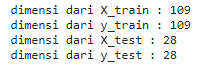

Sekarang kita akan membuat model kita. Kita akan menggunakan polynomial regression. perbedaannya dengan linear regression hanya pada bagian sebelum di set ke model linear regression kita akan ubah dulu dalam bentuk polynomial.

In [11]:
'''Import modul PolynomialFeatures dari sklearn.preprocessing dan taruh di sel package/library
panggil modul linear regression pada sklearn dan tempatkan di sel package/library
'''

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

#setelah ini, di bawah, buatlah model linear regression pada seperti biasa.
#gunakan X_poly untuk menggantikan X_train pada sesi training model linear regression pasangkan dengan y_train
poly_model = LinearRegression()  
poly_model.fit(X_poly, y_train)


LinearRegression()

Expected Output

image.png

Selanjutkan kita akan melakukan evaluasi model kita dengan membuat prediksi dari x_test kita lalu bandingkan hasilnya dengan y_test. cari nilai r_square.

In [12]:
#pertama mari kita prediksi kan seluruh data x_test.
'''kita akan gunakan poly_reg.fit_transform untuk mengubah data kita menjadi bentuk polynomialnya
'''

poly_x_test = poly_reg.fit_transform(X_test)

#setelah itu  buat variabel y_pred dengan menggunakan metode predict dan tampilkan y_pred
y_pred = poly_model.predict(poly_x_test)
y_pred


array([ 7.06400853,  7.11426874, 10.677965  , 10.27098195,  6.11694473,
        8.84051016,  8.92145153,  6.54777542,  5.55610111,  8.02212388,
        8.06742737,  9.64095117,  8.71723935,  8.79966773, 10.11385864,
        9.74637778, 10.24005296, 10.48054546,  5.61330074,  9.23530354,
        6.0067587 , 10.88871715,  6.86048932,  9.95053943,  7.83843157,
        7.31283122, 10.56664085, 10.50949176])

Expected Output

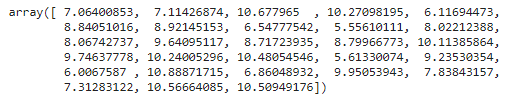

In [13]:
'''Evaluasi model kita dengan fungsi di bawah ini
import metrics dari sklearn dan taruh di sel atas
'''
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.9576332489268025


Expected Output

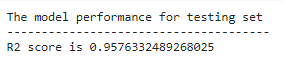

0.95 adalah angka yang baik. Sekarang kita lanjut untuk membuat prediksi data kita.
Ingat, di awal kita ingin memprediksi data kita 30 hari semenjak data terakhir.
buat numpy array dari 137 - 166

In [14]:
#buat variabel numpy array yang diminta dan tampilkan. beri nama variabelnya predict_date
predict_date = np.arange(137,167,1).reshape(-1,1)
predict_date


array([[137],
       [138],
       [139],
       [140],
       [141],
       [142],
       [143],
       [144],
       [145],
       [146],
       [147],
       [148],
       [149],
       [150],
       [151],
       [152],
       [153],
       [154],
       [155],
       [156],
       [157],
       [158],
       [159],
       [160],
       [161],
       [162],
       [163],
       [164],
       [165],
       [166]])

Expected Output

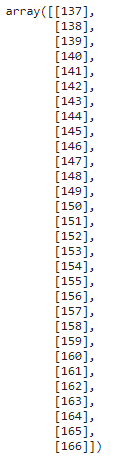

In [15]:
#lakukan prediksi dengan berbasis pada predict_date. manfaatkan kembali poly_reg.fit_transform dan pol_reg.predict.
#beri nama variabelnya predict_cases dan tampilkan

poly_predict = poly_reg.fit_transform(predict_date) 
predict_cases = poly_model.predict(poly_predict)
predict_cases

array([5.32482425, 5.26638545, 5.20769881, 5.14876433, 5.08958201,
       5.03015186, 4.97047388, 4.91054805, 4.8503744 , 4.7899529 ,
       4.72928357, 4.6683664 , 4.6072014 , 4.54578856, 4.48412788,
       4.42221937, 4.36006302, 4.29765884, 4.23500682, 4.17210696,
       4.10895927, 4.04556374, 3.98192037, 3.91802917, 3.85389013,
       3.78950326, 3.72486855, 3.659986  , 3.59485562, 3.5294774 ])

Expected Output

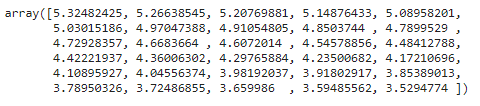

5. Data Analysis
Pada kesempatan kali ini kita akan melakukan analysis. Pertama dengan membuat grafik 30 hari kedepan. lalu menganalisis grafik dan model kita.

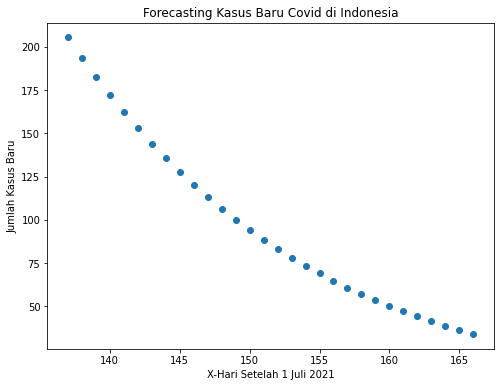

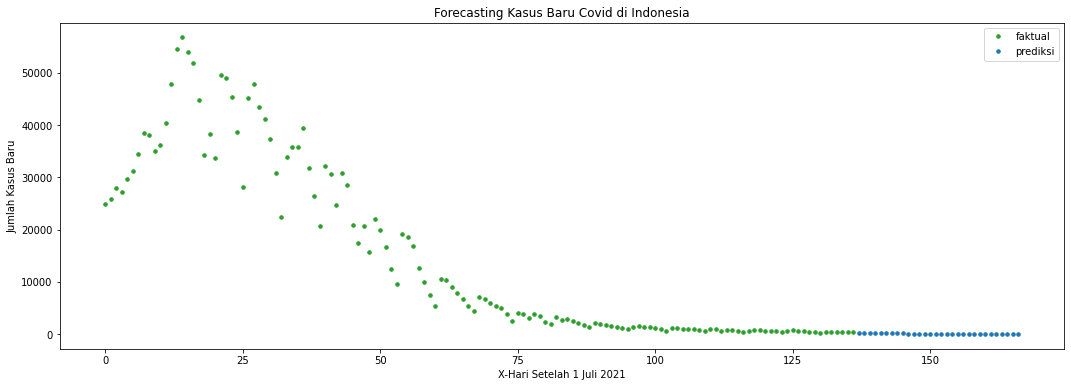

In [20]:
#Disini kita akan melakukan plot grafik predict_date = x dan predict case = y
#Jangan lupa import matplotlib pada sel library/package

tPredictCases = np.exp(predict_cases) 
figure, ax = plt.subplots(figsize=(8,6))
ax.plot(predict_date, tPredictCases , marker="o", linestyle="None") 
ax.set_title("Forecasting Kasus Baru Covid di Indonesia")
ax.set_xlabel("X-Hari Setelah 1 Juli 2021")
ax.set_ylabel("Jumlah Kasus Baru")
plt.show()


print()
figure, ax = plt.subplots(figsize=(18,6))
ax.plot(covid["days"], covid["Kasus_harian"], marker="o", linestyle="None", color="C2", label="faktual", markersize=3.5) 
ax.plot(predict_date, tPredictCases, color="C0", marker="o", linestyle="None", label="prediksi", markersize=3.5)  
ax.set_title("Forecasting Kasus Baru Covid di Indonesia")
ax.set_xlabel("X-Hari Setelah 1 Juli 2021")
ax.set_ylabel("Jumlah Kasus Baru")
plt.legend()
plt.show()


Expected Output

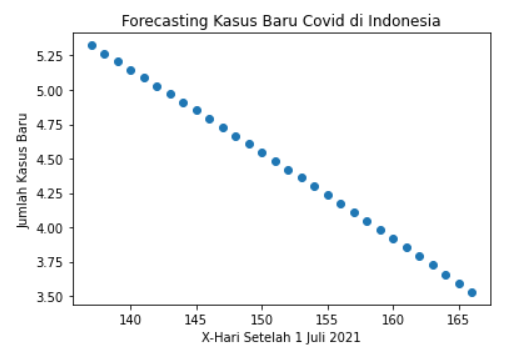

Berikan Analisis kalian disini.
1. tentang grafik prediksi
2. tentang pemilihan polynomial regression dan model secara umum

## 1. Analisis Prediksi Kasus Harian Covid-19

- Pada grafik di atas diperoleh bahwa jumlah kasus harian semakin hari semakin berkurang mengikuti pola polinomial. Dapat dilihat pada grafik bahwa hari ke ~ 165 ditemukan jumlah kasus lebih kecil dari 50.
- Meski tiap jumlah kasus harian semakin berkurang, nilai "penurunan kasus harian" semakin kecil. Misal, penurunan kasus hari ini lebih sedikit dibandingkan penurunan pada kasus kemarin. 
- Akan ada waktu dimana jumlah kasus harian covid-19 di Indonesia mendekati nilai nol.
- Penurunan kasus harian covid ini terjadi karena seiring meningkatnya jumlah masyarakat yang divaksin dan perilaku masyarakat - pemerintah yang telah mengikuti protokol kesehatan.    
- Prediksi ini berlaku jika perilaku masyarakat indonesia dan kebijakan yang dilakukan tetap sama. 
- Jika ada perubahan kondisi seperti perilaku masyarakat atau kebijakan pemerintah berubah (misal dengan lebih abai terhadap protokol kesehatan atau pelonggaran kebijakan) atau ditemukan kembali varian baru, tidak menutup kemungkinan kasus covid akan kembali naik kembali.  

## 2. Pemilihan polynomial regression

**Pros**
- Terlihat dengan jelas bahwa grafik faktual kasus harian dari tanggal **12 juli 2021** hingga **11 november 2021** mengikuti pola polinomial. 
- Dengan demikian pemilihan regresi polinomial ini tepat untuk melakukan prediksi jumlah kasus harian covid di indonesia.
- Pernyataan ini didukung pula dengan nilai prediksi ini mendekati angka 0.96.
- Selain efektif untuk melakukan prediksi, regresi polinomial ini tidak memerlukan komputasi yang rumit. 

**Cons**
- Meski model ini sangat baik, namun model ini tidak akurat untuk memetakan jumlah kasus pada 10 hari pertama (sejak 1 juli 2021). Pada interval waktu tersebut kita bisa lihat bahwa jumlah kasus mengalami kenaikan hingga tanggal tertentu, hingga akhirnya mengalami penurunan mengikuti pola polinomial. 
- Selain itu, margin error tebakan pada hari ke 10 - 50, cukup besar, namun setelah melewati hari ke 50, nampaknya margin tebakannya semakin mengecil.

**Alternative Model**
- Model linear pun bisa digunakan untuk memprediksi kasus harian, namun datasetnya perlu dipotong (mulai dari hari ke 100 dari tanggal 1 juli 2021)


